<a href="https://colab.research.google.com/github/cxbxmxcx/CodingChallenges/blob/master/Challenge_AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS


In [0]:
import urllib
import numpy as np
import matplotlib.pyplot as plt

READ FILE

In [0]:
def read_input_file(url):  
  file = urllib. request. urlopen(url)
  text = ''
  for line in file:
    decoded_line = line.decode("utf-8")  
    text = text + decoded_line
  return text

ROTATION CODE

In [0]:
def rotate_left(dir):
  return np.array((-dir[1],dir[0])) 

def rotate_right(dir):
  return np.array((dir[1],dir[0]))

RENDERING TURTLE PATH RESULTS

In [0]:
def render_turtle_trail(turtle_path, start_direction, origin):
  direction = start_direction
  turtle_spot = origin
  x = np.array((0))
  y = np.array((0))
  path = {}
  moved = False
  for instruction in turtle_path:
    if instruction == "F":
      turtle_spot = turtle_spot + direction
      moved = True
    if instruction == "L":
      direction = rotate_left(direction)
      moved = False
    if instruction == "R":
      direction = rotate_right(direction)
      moved = False

    if moved:
      x = np.append(x, turtle_spot[0])
      y = np.append(y, turtle_spot[1])
      if np.array2string(turtle_spot) in path:
        path[np.array2string(turtle_spot)] += 1
      else:
        path[np.array2string(turtle_spot)] = 1
  print('1. ----------------------------------')
  print(f"Turtle completed at {turtle_spot}")
  print('2. ----------------------------------')
  print('Turtle Path')
  fig = plt.figure()
  ax = fig.gca()
  plt.scatter(x, y)
  plt.grid()
  plt.show()
  print('3. ----------------------------------')
  print('Turtle crossed path over the following points:')
  pnts = ''
  for p in path:  
    if path[p] > 1:
      pnts += p
  print(pnts)


UNIT TESTS

In [122]:
import unittest

class TestNotebook(unittest.TestCase):
  def test_rotate_left(self):
    dir_in = np.array((0.0, 1.0))
    dir_out = np.array((-1.0, 0.0))
    self.assertEqual(rotate_left(dir_in).all(), dir_out.all())

  def test_rotate_right(self):
    dir_in = np.array((0.0, 1.0))
    dir_out = np.array((1.0, 0.0))
    self.assertEqual(rotate_right(dir_in).all(), dir_out.all())

  def test_read_input_file(self):
    test_url = 'https://github.com/cxbxmxcx/CodingChallenges/blob/master/AI_ML/directions-test.txt?raw=true' 
    test_output = 'FLRRFRFRRFRFLLF'
    self.assertEqual(read_input_file(test_url), test_output)

unittest.main(argv=[''], verbosity=2, exit=False)

test_read_input_file (__main__.TestNotebook) ... ok
test_rotate_left (__main__.TestNotebook) ... ok
test_rotate_right (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.456s

OK


RENDER OUTPUT FOR FILE

1. ----------------------------------
Turtle completed at [11.  7.]
2. ----------------------------------
Turtle Path


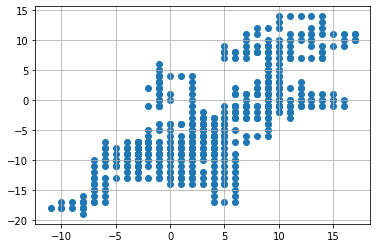

3. ----------------------------------
Turtle crossed path over the following points:
[-1.  1.][-1.  0.][-1. -1.][-1.  2.][-1.  3.][-1.  4.][-1.  5.][ 2. -4.][ 2. -5.][ 2. -6.][ 2. -7.][ 2. -8.][ 1. -8.][ 1. -9.][ 1. -7.][ 2. -9.][  2. -10.][  2. -12.][  1. -12.][  0. -12.][  0. -13.][  0. -10.][ 0. -9.][  1. -10.][ 3. -9.][ 4. -9.][ 4. -8.][ 4. -7.][ 4. -6.][ 3. -6.][ 3. -7.][ 3. -8.][ 0. -8.][ 4. -5.][ 3. -5.][ 3. -4.][ 1. -4.][ 0. -4.][ 4. -4.][ 5. -4.][ 5. -3.][ 6. -3.][ 6. -2.][ 6. -1.][ 7. -1.][ 8. -1.][ 9. -1.][10. -1.][10.  0.][11.  0.][12.  0.][13.  0.][14.  0.][15.  0.][13. -1.][12. -1.][11. -1.][10. -2.][11. -2.][ 7. -2.][ 7. -3.][ 8. -3.][ 4. -3.][ 5. -6.][ 5. -5.][ 5. -9.][-1. -9.][ -1. -10.][ -1. -11.][ -3. -11.][ -3. -10.][-3. -9.][-3. -8.][-3. -7.][-2. -7.][-4. -9.][ -5. -10.][ -5. -11.][ -6. -10.][-6. -8.][-4. -8.][-1. -7.][ 0. -7.][-2. -8.][-2. -9.][ -4. -10.][ -4. -11.][ -3. -12.][-1. -8.][ -7. -13.][ -7. -14.][ -7. -15.][ -8. -17.][ -8. -18.][ -7. -17.][-10. -18.][ -

In [124]:
#@title FIle Test  { run: "auto" }
#@markdown Move the slider to select the file number.
file_num = 1 #@param {type:"slider", min:1, max:5, step:1}
url = f"https://github.com/cxbxmxcx/CodingChallenges/blob/master/AI_ML/directions-{file_num}.txt?raw=true"
turtle_path = read_input_file(url)
dir = np.array((0.0, 1.0)) 
start = np.array((0.0, 0.0))
render_turtle_trail(turtle_path, dir, start)